## Import the libraries

In [1]:
import matplotlib.pyplot as plt
import json
from pennylane import numpy as np

from utils import read_configurations
from Data_load import data_load


## Loaded filtered images 

In [2]:


data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()


config = read_configurations('./config.json')
SAVE_PATH = config['SAVE_PATH'] 
n_channels = config['CHANNELS'] # Number of channels


filtered_train_images = np.load(SAVE_PATH + "filtered_train_images.npy")
filtered_test_images = np.load(SAVE_PATH + "filtered_test_images.npy")
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

600


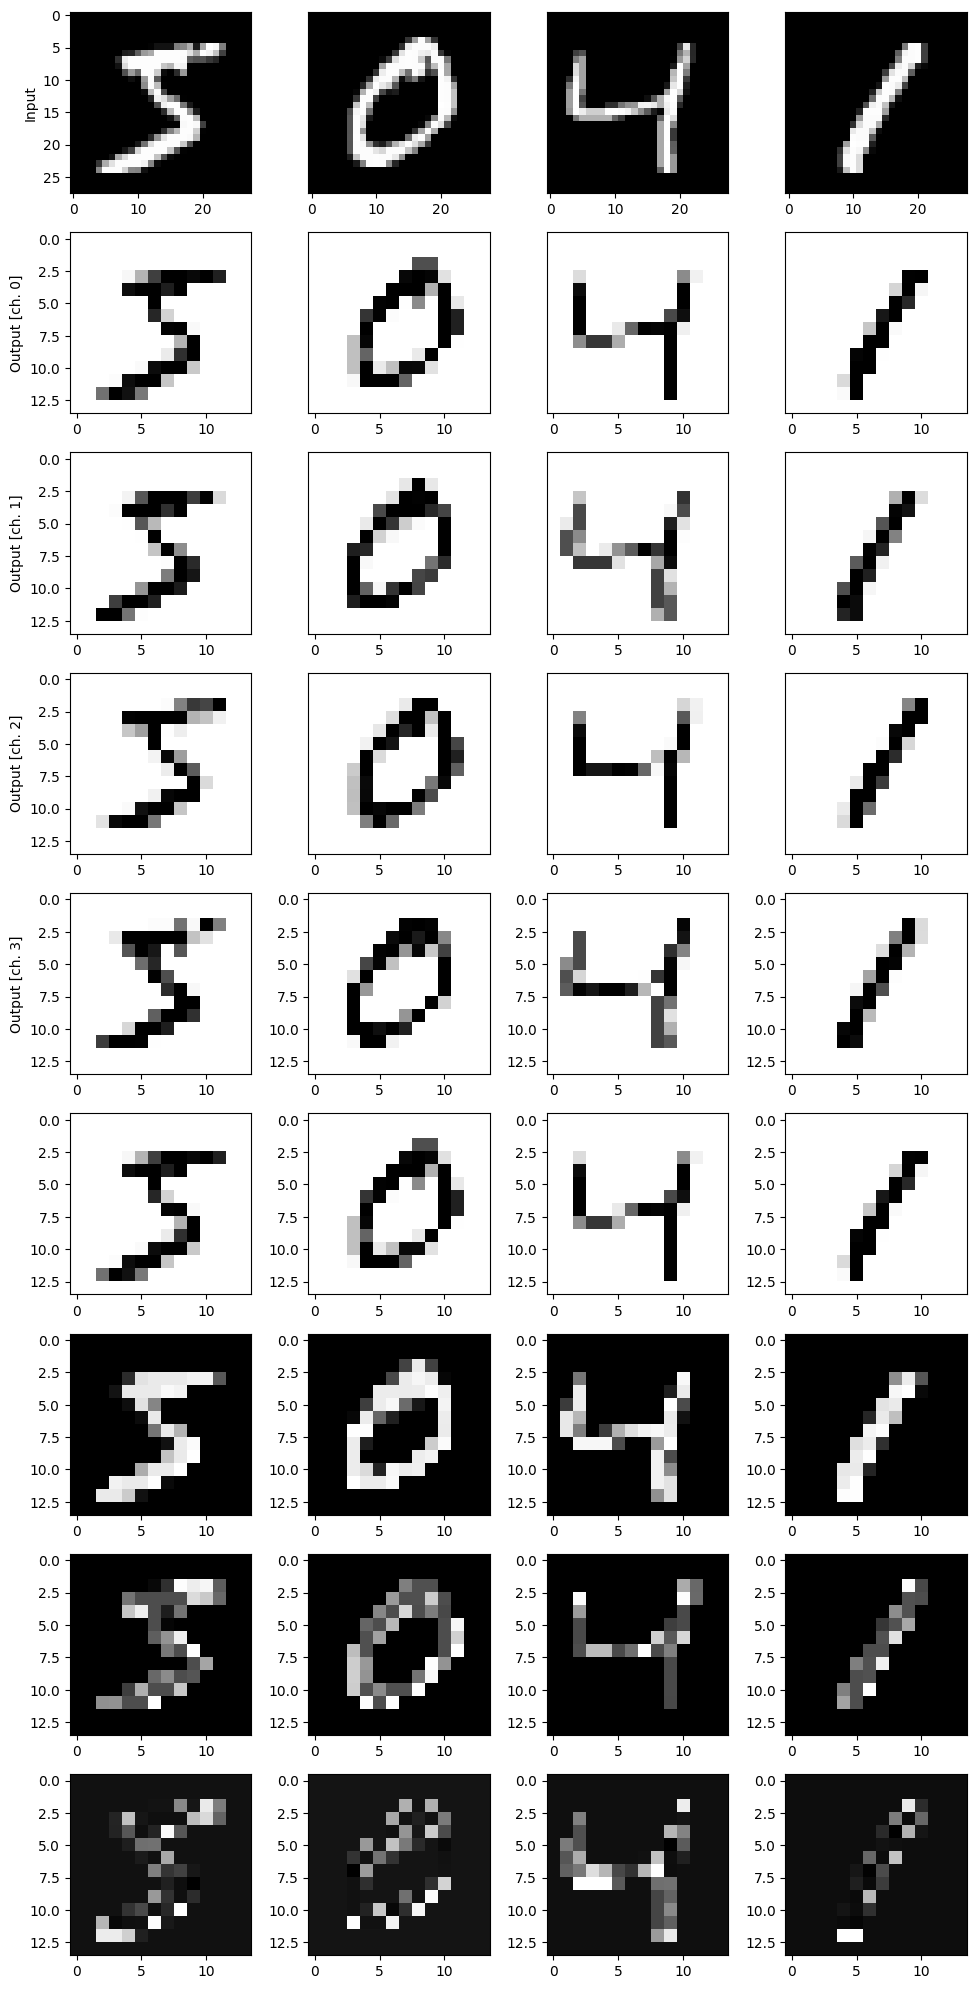

In [3]:
n_samples = 4

fig, axes = plt.subplots(1 + n_channels+4, n_samples, figsize=(10, 20))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :], cmap="gray")


    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(filtered_train_images[k, :, :, c], cmap="gray")
        axes[c + 5, k].imshow(q_train_images[k, :, :, c], cmap="gray")


plt.tight_layout()
plt.show()

## Load results 

In [4]:
#load the results from Json file
with open(SAVE_PATH +'q_history.json','r') as json_file:
    results_quantum = json.load(json_file)
with open(SAVE_PATH +'classical_filtered_history.json','r') as json_file:
    results_filtered_classic = json.load(json_file)
with open(SAVE_PATH +'classical_history.json','r') as json_file:
    results_classic = json.load(json_file)

## Visualisation

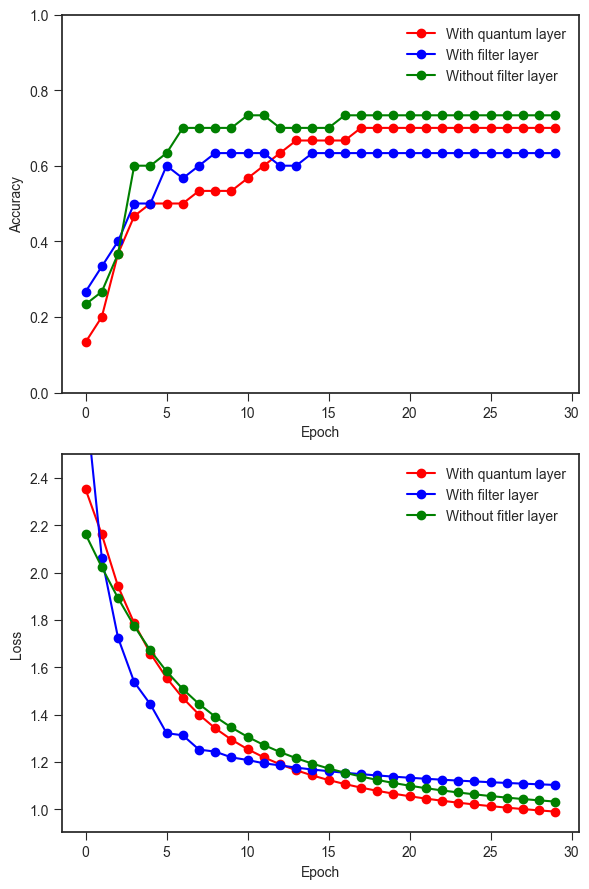

In [5]:
%matplotlib inline
plt.style.use("seaborn-v0_8-ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(results_quantum["val_accuracy"], "-or", label="With quantum layer")
ax1.plot(results_filtered_classic["val_accuracy"], "-ob", label="With filter layer")
ax1.plot(results_classic["val_accuracy"], "-og", label="Without filter layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(results_quantum["val_loss"], "-or", label="With quantum layer")
ax2.plot(results_filtered_classic["val_loss"], "-ob", label="With filter layer")
ax2.plot(results_classic["val_loss"], "-og", label="Without fitler layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [6]:
np.shape(filtered_train_images)

(50, 14, 14, 4)

In [7]:
np.shape(train_images)

(600, 28, 28, 1)

In [8]:
np.shape(q_train_images)

(50, 14, 14, 4)